In [54]:
import pandas as pd
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, RepeatVector
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [35]:
#data1=pd.read_csv("AZURE-FG_605.csv")
In1="The graph shows palnning forecast for the period of 08/01/2019 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 13.755266 and maximum of 17.942501. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/2020 and it is at lowest at the time of 05/01/2020."
out1="The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time."
#data2=pd.read_csv("AZURE-FG_622.csv")
In2="The graph shows palnning forecast for the period of 14/04/2011 to 11/11/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 1006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2019 and it is at lowest at the time of 02/01/2020."
out2="The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time."
summarydata=[['The graph shows palnning forecast for the period of 08/07/8019 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 13.755266 and maximum of 17.942501. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/3020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/12/2007 to 23/05/2011. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 13/01/2010 and it is at lowest at the time of 19/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 97/07/2091 to 11/19/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2019 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/01/6099 to 07/09/6069. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 16.755666 and maximum of 17.976509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/6060 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/92/2007 to 23/05/2099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 13/01/2090 and it is at lowest at the time of 99/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 94/04/2011 to 99/11/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 08/01/2019 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 13.755266 and maximum of 97.972509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/2020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/92/2007 to 23/05/2099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 67.5465 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 16/09/2090 and it is at lowest at the time of 99/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 14/04/2011 to 11/11/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/01/2079 to 07/07/2027. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 96.755266 and maximum of 97.942509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 07/07/2020 and it is at lowest at the time of 05/07/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 76/72/2007 to 26/05/2011. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 67.5765 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 16/01/2010 and it is at lowest at the time of 19/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 17/04/6019 to 99/99/6063. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_633. Statistical forecast quantity varies from minimum of 366.79305399999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/09/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/09/2099 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 13.755266 and maximum of 17.942501. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/2020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/12/2007 to 23/05/2019. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_695. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/01/2010 and it is at lowest at the time of 19/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 14/04/6011 to 79/99/6066. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_666. Statistical forecast quantity varies from minimum of 666.79605299999995 and maximum of 7006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/07/2079 and it is at lowest at the time of 02/07/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/07/2079 to 07/07/2029. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 91.755266 and maximum of 97.942507. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 07/07/2020 and it is at lowest at the time of 05/07/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 96/92/2007 to 21/05/2097. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_675. Statistical forecast quantity varies from minimum of 17.5715 and maximum of 155.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 71/07/1090 and it is at lowest at the time of 99/07/7009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 97/07/7077 to 77/79/4044. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_642. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/06/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 08/06/4069 to 07/06/4046. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 61.755466 and maximum of 67.944506. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 06/06/4040 and it is at lowest at the time of 05/05/4020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 56/52/2007 to 21/05/2055. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_655. Statistical forecast quantity varies from minimum of 14.5415 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 51/05/2050 and it is at lowest at the time of 59/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 94/04/2099 to 99/95/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 4006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/04/2099 and it is at lowest at the time of 02/09/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/09/2049 to 07/04/2024. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 91.755266 and maximum of 97.942504. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 04/04/2020 and it is at lowest at the time of 05/09/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 96/94/4007 to 41/05/4044. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_645. Statistical forecast quantity varies from minimum of 14.5415 and maximum of 455.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/09/4090 and it is at lowest at the time of 99/07/7009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 97/07/7044 to 44/99/4042. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 2006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/02/2029 and it is at lowest at the time of 02/02/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/02/2029 to 07/02/2022. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 23.755266 and maximum of 97.942509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/02/2020 and it is at lowest at the time of 05/02/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 96/92/2007 to 23/05/2099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_695. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/09/2090 and it is at lowest at the time of 99/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 94/04/2099 to 99/22/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 2006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2019 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/01/4019 to 07/01/4051. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 91.755566 and maximum of 97.945509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/5050 and it is at lowest at the time of 05/09/5050.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/15/5007 to 51/05/2011. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 17.5715 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 11/01/2010 and it is at lowest at the time of 19/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 17/07/2011 to 11/19/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/09/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 08/09/2099 to 07/09/2029. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 91.755266 and maximum of 97.972509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/12/2007 to 21/05/2011. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 14.5415 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/09/2090 and it is at lowest at the time of 99/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 94/04/2011 to 11/11/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 1006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2019 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/09/7099 to 07/09/7079. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 93.755766 and maximum of 97.947509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/7070 and it is at lowest at the time of 05/09/7070.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 96/97/7007 to 73/05/7099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_695. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/09/2020 and it is at lowest at the time of 29/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 24/04/2022 to 21/11/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/09/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/09/2099 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 11.755266 and maximum of 97.942509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/12/2007 to 21/05/2099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_695. Statistical forecast quantity varies from minimum of 14.5415 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 91/09/2010 and it is at lowest at the time of 19/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 24/04/2099 to 92/22/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 2006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/02/2029 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/01/7019 to 07/01/7071. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 73.755766 and maximum of 77.977501. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/7070 and it is at lowest at the time of 05/01/8080.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/18/8007 to 83/05/8099. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_695. Statistical forecast quantity varies from minimum of 37.5735 and maximum of 855.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 93/09/8090 and it is at lowest at the time of 99/07/8009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 97/07/8099 to 91/11/8088. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_688. Statistical forecast quantity varies from minimum of 866.79205299999995 and maximum of 1006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/01/2019 and it is at lowest at the time of 02/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 08/01/2019 to 07/01/2021. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 13.755266 and maximum of 17.972501. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 01/01/2020 and it is at lowest at the time of 05/01/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 16/12/2007 to 23/05/2011. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 13/01/2090 and it is at lowest at the time of 99/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 94/04/2099 to 99/99/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 866.79805899999995 and maximum of 9006.708868. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/8099 and it is at lowest at the time of 08/09/8080.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
            ['The graph shows palnning forecast for the period of 08/09/8099 to 07/09/8089. It shows forecast for the combination of Loc_ID of FLORIDA and Prod_ID of FG_605. Statistical forecast quantity varies from minimum of 91.755866 and maximum of 97.948509. There is negative trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/09/8080 and it is at lowest at the time of 05/01/8080.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 26/22/2007 to 21/05/2022. It shows forecast for the combination of Loc_ID of TEXAS and Prod_ID of FG_615. Statistical forecast quantity varies from minimum of 14.5415 and maximum of 255.656. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 11/01/2070 and it is at lowest at the time of 79/07/2009.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
             ['The graph shows palnning forecast for the period of 74/04/2077 to 77/77/2022. It shows forecast for the combination of Loc_ID of CALIFORNIA and Prod_ID of FG_622. Statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 7006.708862. There is positive trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of 09/07/2079 and it is at lowest at the time of 02/07/2020.','The graph shows palnning forecast for the period of planning_period_min to planning_period_max. It shows forecast for the combination of Loc_ID of Location and Prod_ID of Product. Statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. There is trend_val trend in the AIP forecast for the given period. The forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.']]

In [36]:
summarydata = array(summarydata)

In [37]:
import re, string,unicodedata
#import inflect
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [38]:
# convert to lowercase
for i in range(len(summarydata)):
    summarydata[i,0] = summarydata[i,0].lower()
    
    summarydata[i,1] = summarydata[i,1].lower()

In [39]:
# empty lists
in_l = []
out_l = []

# populate the lists with sentence lengths
for i in summarydata[:,0]:
    in_l.append(len(i.split()))

for i in summarydata[:,1]:
    out_l.append(len(i.split()))

In [40]:
# function to build a tokenizer
def tokenization(lines):
      tokenizer = Tokenizer()
      tokenizer.fit_on_texts(lines)
      return tokenizer

In [41]:
# prepare tokenizer for input
in_tokenizer = tokenization(summarydata[:, 0])
in_vocab_size = len(in_tokenizer.word_index) + 1

in_length=100

print('Input Vocabulary Size: %d' % in_vocab_size)

Input Vocabulary Size: 200


In [42]:
summarydata[:, 0][:2]

array(['the graph shows palnning forecast for the period of 08/07/8019 to 07/01/2021. it shows forecast for the combination of loc_id of florida and prod_id of fg_605. statistical forecast quantity varies from minimum of 13.755266 and maximum of 17.942501. there is negative trend in the aip forecast for the given period. the forecast quantity is at peak at the time of 01/01/3020 and it is at lowest at the time of 05/01/2020.',
       'the graph shows palnning forecast for the period of 16/12/2007 to 23/05/2011. it shows forecast for the combination of loc_id of texas and prod_id of fg_615. statistical forecast quantity varies from minimum of 34.5435 and maximum of 255.656. there is positive trend in the aip forecast for the given period. the forecast quantity is at peak at the time of 13/01/2010 and it is at lowest at the time of 19/07/2009.'],
      dtype='<U444')

In [43]:
# prepare tokenizer for output
out_tokenizer = tokenization(summarydata[:, 1])
out_vocab_size = len(out_tokenizer.word_index) + 1

out_length=100

print('Output Vocabulary Size: %d' % out_vocab_size)

Output Vocabulary Size: 39


In [44]:
summarydata[:, 1][:2]

array(['the graph shows palnning forecast for the period of planning_period_min to planning_period_max. it shows forecast for the combination of loc_id of location and prod_id of product. statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. there is trend_val trend in the aip forecast for the given period. the forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.',
       'the graph shows palnning forecast for the period of planning_period_min to planning_period_max. it shows forecast for the combination of loc_id of location and prod_id of product. statistical forecast quantity varies from minimum of min_quantity and maximum of max_quantity. there is trend_val trend in the aip forecast for the given period. the forecast quantity is at peak at the time of peak_time and it is at lowest at the time of low_time.'],
      dtype='<U444')

In [45]:
from keras.preprocessing.text import Tokenizer
# encode and pad sequences
def encode_sequences(tokenizer, length, words):
     # integer encode sequences
     seq = tokenizer.texts_to_sequences(words)
     # pad sequences with 0 values
     seq = pad_sequences(seq, maxlen=length, padding='post')
     return seq

In [46]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(summarydata, test_size=0.2, random_state = 12)

In [47]:
# prepare training data
trainX = encode_sequences(in_tokenizer, in_length, train[:, 0])
trainY = encode_sequences(out_tokenizer, out_length, train[:, 1])

In [48]:
train[:, 0][:3]

array(['the graph shows palnning forecast for the period of 97/07/7077 to 77/79/4044. it shows forecast for the combination of loc_id of california and prod_id of fg_642. statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 9006.708862. there is positive trend in the aip forecast for the given period. the forecast quantity is at peak at the time of 09/09/2099 and it is at lowest at the time of 02/06/2020.',
       'the graph shows palnning forecast for the period of 94/04/2011 to 11/11/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity varies from minimum of 266.79205299999995 and maximum of 1006.708862. there is positive trend in the aip forecast for the given period. the forecast quantity is at peak at the time of 09/01/2019 and it is at lowest at the time of 02/01/2020.',
       'the graph shows palnning forecast for the period of 24/04/2022 to 21/11/2022. it shows forecast for th

In [49]:
# prepare validation data
testX = encode_sequences(in_tokenizer, in_length, test[:, 0])
testY = encode_sequences(out_tokenizer, out_length, test[:, 1])

In [50]:
trainX.shape

(38, 100)

In [51]:
trainY.shape

(38, 100)

In [52]:
# build summary generation model
def build_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [55]:
model = build_model(in_vocab_size, out_vocab_size, in_length, out_length, 12)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

W0823 16:47:47.067293 10044 deprecation.py:323] From C:\D\Installations\Anaconda\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\backend.py:3868: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [153]:
filename = '22082019.model'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), 
          epochs=200, batch_size=1, 
          validation_split = 0.2,
          callbacks=[checkpoint], verbose=1)

Train on 30 samples, validate on 8 samples
Epoch 1/200
30/30 [==============================] - 10s 333ms/step - loss: 3.5523 - val_loss: 3.4102

Epoch 00001: val_loss improved from inf to 3.41024, saving model to 22082019.model
Epoch 2/200
30/30 [==============================] - 4s 128ms/step - loss: 3.3404 - val_loss: 3.2867

Epoch 00002: val_loss improved from 3.41024 to 3.28672, saving model to 22082019.model
Epoch 3/200
30/30 [==============================] - 4s 122ms/step - loss: 3.2605 - val_loss: 3.2213

Epoch 00003: val_loss improved from 3.28672 to 3.22127, saving model to 22082019.model
Epoch 4/200
30/30 [==============================] - 4s 124ms/step - loss: 3.1926 - val_loss: 3.1733

Epoch 00004: val_loss improved from 3.22127 to 3.17328, saving model to 22082019.model
Epoch 5/200
30/30 [==============================] - 4s 133ms/step - loss: 3.1397 - val_loss: 3.0975

Epoch 00005: val_loss improved from 3.17328 to 3.09751, saving model to 22082019.model
Epoch 6/200
30/

30/30 [==============================] - 4s 135ms/step - loss: 1.5582 - val_loss: 1.5008

Epoch 00095: val_loss improved from 1.54106 to 1.50075, saving model to 22082019.model
Epoch 96/200
30/30 [==============================] - 4s 135ms/step - loss: 1.5460 - val_loss: 1.5459

Epoch 00096: val_loss did not improve from 1.50075
Epoch 97/200
30/30 [==============================] - 4s 139ms/step - loss: 1.5452 - val_loss: 1.5227

Epoch 00097: val_loss did not improve from 1.50075
Epoch 98/200
30/30 [==============================] - 4s 137ms/step - loss: 1.5390 - val_loss: 1.5389

Epoch 00098: val_loss did not improve from 1.50075
Epoch 99/200
30/30 [==============================] - 4s 135ms/step - loss: 1.5369 - val_loss: 1.5275

Epoch 00099: val_loss did not improve from 1.50075
Epoch 100/200
30/30 [==============================] - 4s 137ms/step - loss: 1.5329 - val_loss: 1.5656

Epoch 00100: val_loss did not improve from 1.50075
Epoch 101/200
30/30 [==============================]

30/30 [==============================] - 4s 149ms/step - loss: 1.1815 - val_loss: 1.1580

Epoch 00195: val_loss did not improve from 1.14313
Epoch 196/200
30/30 [==============================] - 4s 147ms/step - loss: 1.1786 - val_loss: 1.1450

Epoch 00196: val_loss did not improve from 1.14313
Epoch 197/200
30/30 [==============================] - 4s 143ms/step - loss: 1.1736 - val_loss: 1.1249

Epoch 00197: val_loss improved from 1.14313 to 1.12493, saving model to 22082019.model
Epoch 198/200
30/30 [==============================] - 4s 141ms/step - loss: 1.1720 - val_loss: 1.1240

Epoch 00198: val_loss improved from 1.12493 to 1.12396, saving model to 22082019.model
Epoch 199/200
30/30 [==============================] - 4s 140ms/step - loss: 1.1679 - val_loss: 1.1891

Epoch 00199: val_loss did not improve from 1.12396
Epoch 200/200
30/30 [==============================] - 4s 136ms/step - loss: 1.1686 - val_loss: 1.1757

Epoch 00200: val_loss did not improve from 1.12396


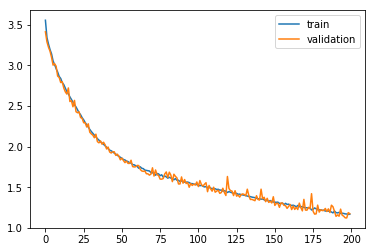

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [155]:
model = load_model('22082019.model')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

In [156]:
preds

array([[ 1, 19, 11, 20,  3,  8,  8,  4,  2, 12,  4,  4, 12, 12,  4, 14,
        15, 11, 11,  3,  1, 22, 22, 23,  2,  2, 24,  9, 25, 25, 16, 26,
        27, 27,  5, 28, 29, 30, 30, 13,  2,  9,  5,  5, 14, 14, 32, 32,
        17, 17, 17, 17, 34,  3,  3,  1,  1,  1,  1,  1,  1,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1, 19, 11, 20,  3,  8,  8,  4,  2, 12,  4,  4, 12, 21,  4, 14,
        15, 11, 11,  3,  1, 22, 22, 23,  2,  2, 24, 24, 25, 25, 16, 26,
        26, 27,  5, 28, 29, 30, 30,  2,  2,  2,  5,  5,  5, 14, 32, 32,
        17, 17, 17, 17, 34,  1,  3,  1,  1,  1,  1,  1,  1,  1,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
         7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 1, 19, 11, 20,  3,  8,  8,  4,  2, 12,  4,  4, 12, 12,  4, 14,
        15, 11

In [157]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
    return None

In [158]:
# convert predictions into text
preds_text = []
for i in preds:
    temp = []
    for j in range(len(i)):
        t = get_word(i[j], out_tokenizer)
        if j > 0:
            if (t == get_word(i[j-1], out_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
             
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t)            
        
    preds_text.append(' '.join(temp))

In [159]:
pred_df = pd.DataFrame({'actual' : test[:,0], 'predicted' : preds_text})

In [160]:
pd.set_option('display.max_colwidth', 200)

In [161]:
pred_df.head(15)

,actual,predicted
0,the graph shows palnning forecast for the period of 94/04/2099 to 99/22/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity var...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
1,the graph shows palnning forecast for the period of 94/04/2099 to 99/99/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity var...,the graph shows palnning forecast for period of planning period planning to period max it shows forecast the combination loc of location prod id product statistical quantity varies from mi...
2,the graph shows palnning forecast for the period of 16/92/2007 to 23/05/2099. it shows forecast for the combination of loc_id of texas and prod_id of fg_615. statistical forecast quantity varies f...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
3,the graph shows palnning forecast for the period of 08/01/7019 to 07/01/7071. it shows forecast for the combination of loc_id of florida and prod_id of fg_605. statistical forecast quantity varies...,the graph shows palnning forecast for period of planning min period planning period max it shows forecast the combination loc of location prod id product statistical quantity varies from m...
4,the graph shows palnning forecast for the period of 08/09/2099 to 07/01/2021. it shows forecast for the combination of loc_id of florida and prod_id of fg_605. statistical forecast quantity varies...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
5,the graph shows palnning forecast for the period of 26/22/2007 to 21/05/2022. it shows forecast for the combination of loc_id of texas and prod_id of fg_615. statistical forecast quantity varies f...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
6,the graph shows palnning forecast for the period of 94/04/2099 to 99/95/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity var...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
7,the graph shows palnning forecast for the period of 17/07/2011 to 11/19/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity var...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
8,the graph shows palnning forecast for the period of 56/52/2007 to 21/05/2055. it shows forecast for the combination of loc_id of texas and prod_id of fg_655. statistical forecast quantity varies f...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...
9,the graph shows palnning forecast for the period of 14/04/2011 to 11/11/2022. it shows forecast for the combination of loc_id of california and prod_id of fg_622. statistical forecast quantity var...,the graph shows palnning forecast for period of planning period planning period max it shows forecast the combination loc of location and prod id product statistical quantity varies from m...


# Rajat

In [59]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [60]:
# load ascii text and covert to lowercase
filename = "Sonnet.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print ("Total Characters: ", n_chars)
print ("Total Vocab: ", n_vocab)
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print ("Total Patterns: ", n_patterns)

Total Characters:  100269
Total Vocab:  38
Total Patterns:  100169


In [61]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)
# define the LSTM model
modell = Sequential()
modell.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
modell.add(Dropout(0.2))
modell.add(Dense(y.shape[1], activation='softmax'))
modell.compile(loss='categorical_crossentropy', optimizer='adam')
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
# fit the model
model.fit(X, y, epochs=20, batch_size=128, callbacks=callbacks_list)

ValueError: Error when checking input: expected embedding_input to have 2 dimensions, but got array with shape (100169, 100, 1)